# FML Homework 1 - Erin Choi

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# load data; note each row represents a housing block, not a house
# median_house_value = the outcome variable
data = pd.read_csv('housingUnits.csv')
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,223,322,126,208.1300,1,452600
1,21,7099,1338,2401,1138,207.5350,1,358500
2,52,1467,328,496,177,181.4350,1,352100
3,52,1274,293,558,219,141.0775,1,341300
4,52,1627,357,565,259,96.1550,1,342200


## Question 1
Why is it a good idea to standardize/normalize the predictor variables 2 and 3 and why are predictor variables 4 and 5 probably not very useful by themselves to predict median house values in a block?

In [3]:
# summary statistics of the four columns
print("Summary statistics for predictors 2 through 5:")
print(data[['total_rooms', 'total_bedrooms', 'population', 'households']].describe())

Summary statistics for predictors 2 through 5:
        total_rooms  total_bedrooms    population    households
count  20640.000000    20640.000000  20640.000000  20640.000000
mean    2635.763081      537.735271   1425.476744    499.539680
std     2181.615252      391.392913   1132.462122    382.329753
min        2.000000       65.000000      3.000000      1.000000
25%     1447.750000      324.750000    787.000000    280.000000
50%     2127.000000      446.000000   1166.000000    409.000000
75%     3148.000000      630.000000   1725.000000    605.000000
max    39320.000000     7119.000000  35682.000000   6082.000000


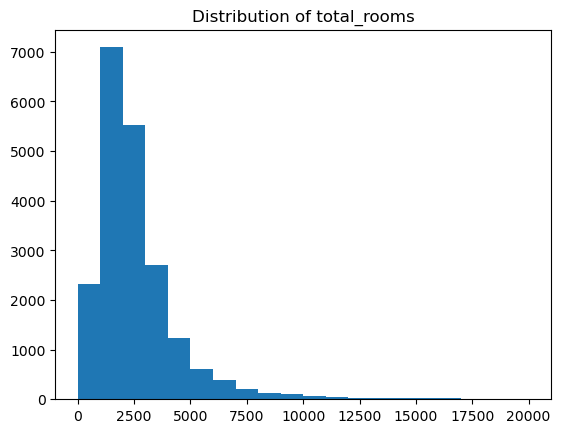

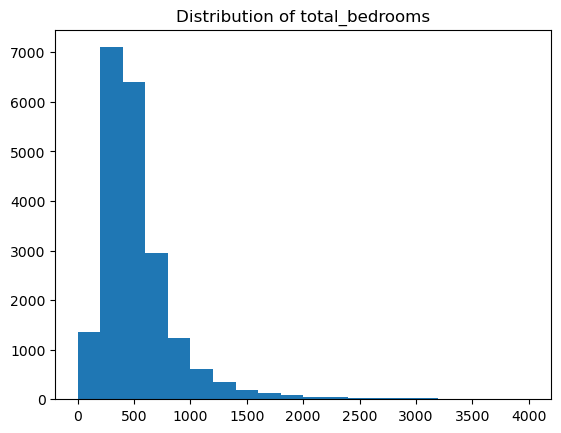

In [4]:
# histograms of the columns for total rooms, total bedrooms
plt.hist(data['total_rooms'], bins=20, range=[0,20000]);
plt.title('Distribution of total_rooms')
plt.show()

plt.hist(data['total_bedrooms'], bins=20, range=[0,4000]);
plt.title('Distribution of total_bedrooms')
plt.show()

In [6]:
# r^2 of population to outcome
print("r^2 between population and median_house_value:", (corrmat['median_house_value']['population'])**2)

r^2 between population and median_house_value: 0.0006076066693256292


In [7]:
# r^2 of households to outcome
print("r^2 between households and median_house_value:", (corrmat['median_house_value']['households'])**2)

r^2 between households and median_house_value: 0.004335254634090548


## Question 2
To meaningfully use predictor variables 2 (number of rooms) and 3 (number of bedrooms), you will need to standardize/normalize them. Using the data, is it better to normalize them by population (4) or number of households (5)?

In [8]:
# normalize both variables 2 and 3 by 4 and 5
normalized_variables = pd.DataFrame()
normalized_variables['rooms_per_person'] = data['total_rooms']/data['population']
normalized_variables['bedrooms_per_person'] = data['total_bedrooms']/data['population']
normalized_variables['rooms_per_household'] = data['total_rooms']/data['households']
normalized_variables['bedrooms_per_household'] = data['total_bedrooms']/data['households']
normalized_variables.head()

,rooms_per_person,bedrooms_per_person,rooms_per_household,bedrooms_per_household
0,2.732919,0.692547,6.984127,1.769841
1,2.956685,0.557268,6.238137,1.175747
2,2.957661,0.661290,8.288136,1.853107
3,2.283154,0.525090,5.817352,1.337900
4,2.879646,0.631858,6.281853,1.378378


In [9]:
# correlations and r^2
# rooms / population
print("Correlation between rooms_per_person and median_house_value:",
      normalized_variables['rooms_per_person'].corr(data['median_house_value']))
print("r^2:", (normalized_variables['rooms_per_person'].corr(data['median_house_value']))**2)

Correlation between rooms_per_person and median_house_value: 0.2094819690066896
r^2: 0.04388269533891967


In [10]:
# bedrooms / population
print("Correlation between bedrooms_per_person and median_house_value:",
      normalized_variables['bedrooms_per_person'].corr(data['median_house_value']))
print("r^2:", (normalized_variables['bedrooms_per_person'].corr(data['median_house_value']))**2)

Correlation between bedrooms_per_person and median_house_value: 0.11309509846221796
r^2: 0.012790501296178775


In [11]:
# rooms / household
print("Correlation between rooms_per_household and median_house_value:",
      normalized_variables['rooms_per_household'].corr(data['median_house_value']))
print("r^2:", (normalized_variables['rooms_per_household'].corr(data['median_house_value']))**2)

Correlation between rooms_per_household and median_house_value: 0.1519482897414578
r^2: 0.02308828275535401


In [12]:
# bedrooms / household
print("Correlation between bedrooms_per_household and median_house_value:",
      normalized_variables['bedrooms_per_household'].corr(data['median_house_value']))
print("r^2:", (normalized_variables['bedrooms_per_household'].corr(data['median_house_value']))**2)

Correlation between bedrooms_per_household and median_house_value: 0.05826043391267521
r^2: 0.0033942781596931954


In [13]:
# copy the data to create a new dataset with the chosen normalized variables
# divided by population
data_norm = data.copy()
data_norm['rooms_per_person'] = normalized_variables['rooms_per_person']
data_norm['bedrooms_per_person'] = normalized_variables['bedrooms_per_person']
data_norm.drop(columns=['total_rooms', 'total_bedrooms'], inplace=True)
data_norm.head()

,housing_median_age,population,households,median_income,ocean_proximity,median_house_value,rooms_per_person,bedrooms_per_person
0,41,322,126,208.1300,1,452600,2.732919,0.692547
1,21,2401,1138,207.5350,1,358500,2.956685,0.557268
2,52,496,177,181.4350,1,352100,2.957661,0.661290
3,52,558,219,141.0775,1,341300,2.283154,0.525090
4,52,565,259,96.1550,1,342200,2.879646,0.631858


## Question 3
Which of the seven variables is most *and* least predictive of housing value, from a simple linear regression perspective? [Hints: a) Make sure to use the standardized/normalized variables from 2. above; b) Make sure to inspect the scatter plots and comment on a potential issue – would the best predictor be even more predictive if not for an unfortunate limitation of the data?]

In [14]:
# check updated correlation matrix
print("Updated correlations between predictors and outcome:")
print(data_norm.corr()['median_house_value'].sort_values(ascending = False))

Updated correlations between predictors and outcome:
median_house_value     1.000000
median_income          0.688075
rooms_per_person       0.209482
bedrooms_per_person    0.113095
housing_median_age     0.105623
households             0.065843
population            -0.024650
ocean_proximity       -0.397251
Name: median_house_value, dtype: float64


In [15]:
# split the data into train/test sets
xTrain, xTest, yTrain, yTest = train_test_split(data_norm[['housing_median_age', 'rooms_per_person', 
                                                           'bedrooms_per_person', 'population',
                                                           'households', 'median_income', 
                                                           'ocean_proximity']], 
                                                data_norm['median_house_value'], 
                                                test_size=0.2, random_state=0)
# xTrain.shape, xTest.shape

In [16]:
# loop through predictor variables and fit linear regressions to each,
# calculate R^2 value for each model
varlist = ['housing_median_age','rooms_per_person', 'bedrooms_per_person',
           'population', 'households', 'median_income', 'ocean_proximity']
for varname in varlist:
    model = LinearRegression().fit(pd.DataFrame(xTrain[varname]), yTrain)
    print("R^2 of model using", varname+":", model.score(pd.DataFrame(xTest[varname]), yTest))

R^2 of model using housing_median_age: 0.010112709993501667
R^2 of model using rooms_per_person: 0.027141134051546723
R^2 of model using bedrooms_per_person: 0.009407943152004772
R^2 of model using population: -0.00022540672756665714
R^2 of model using households: 0.005844626700084898
R^2 of model using median_income: 0.4466846804895944
R^2 of model using ocean_proximity: 0.1499223234285768


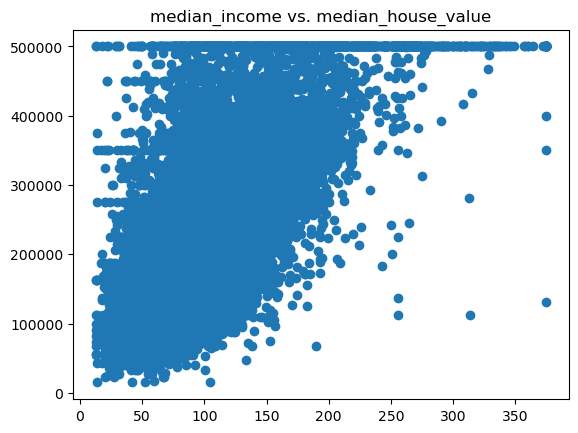

In [17]:
# plot best predictor against outcome
plt.scatter(data_norm['median_income'], data_norm['median_house_value'])
plt.title("median_income vs. median_house_value")
plt.show()

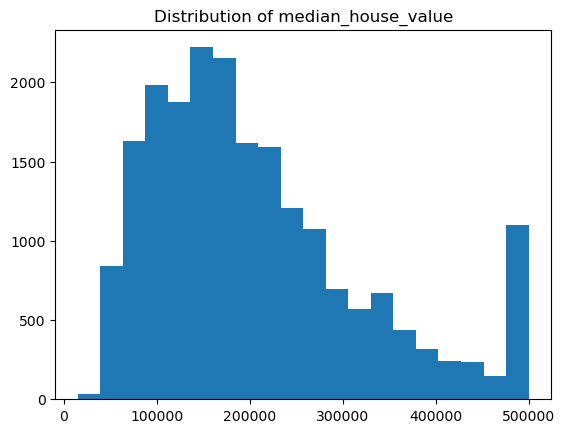

In [18]:
# histogram to investigate the line of points at the top of the scatterplot
plt.hist(data_norm['median_house_value'], bins=20);
plt.title("Distribution of median_house_value");
plt.show()

In [19]:
# value counts to further investigate
print("Value counts of median_house_value:")
print(data_norm['median_house_value'].value_counts())

Value counts of median_house_value:
500001    965
137500    122
162500    117
112500    103
187500     93
         ... 
359200      1
54900       1
377600      1
81200       1
47000       1
Name: median_house_value, Length: 3842, dtype: int64


## Question 4
Putting all predictors together in a multiple regression model – how well do these predictors taken together predict housing value? How does this full model compare to the model that just has the single best predictor from 3.?

In [20]:
# not using population due to collinearity. dropping from the train/test sets
xTrain, xTest, yTrain, yTest = train_test_split(data_norm[['housing_median_age', 'rooms_per_person', 
                                                           'bedrooms_per_person', 'households', 
                                                           'median_income', 'ocean_proximity']], 
                                                data_norm['median_house_value'], 
                                                test_size=0.2, random_state=0)

In [21]:
# regression with single variable
model_simple = LinearRegression().fit(pd.DataFrame(xTrain['median_income']), yTrain)
yPred = model_simple.predict(pd.DataFrame(xTest['median_income']))

print("Validating linear regression using only median_income")
print("R^2:", model_simple.score(pd.DataFrame(xTest['median_income']), yTest))
print("RMSE:", np.sqrt(mean_squared_error(yTest, yPred)))

Validating linear regression using only median_income
R^2: 0.4466846804895944
RMSE: 84941.05152406936


In [22]:
# regression with multiple variables
model_multi = LinearRegression().fit(pd.DataFrame(xTrain), yTrain)
yPred = model_multi.predict(pd.DataFrame(xTest))

print("Validating multiple regression using all predictors")
print("R^2:", model_multi.score(pd.DataFrame(xTest), yTest))
print("RMSE:", np.sqrt(mean_squared_error(yTest, yPred)))

Validating multiple regression using all predictors
R^2: 0.5663761557824927
RMSE: 75194.80949028315


In [23]:
print("Weights of variables")
for i in range(6):
    print(xTrain.columns[i]+":", model_multi.coef_[i])

Weights of variables
housing_median_age: 1367.070641789342
rooms_per_person: 7097.620916145982
bedrooms_per_person: 7494.910059512402
households: 31.00055979445314
median_income: 1568.2292555778897
ocean_proximity: -30048.542610457553


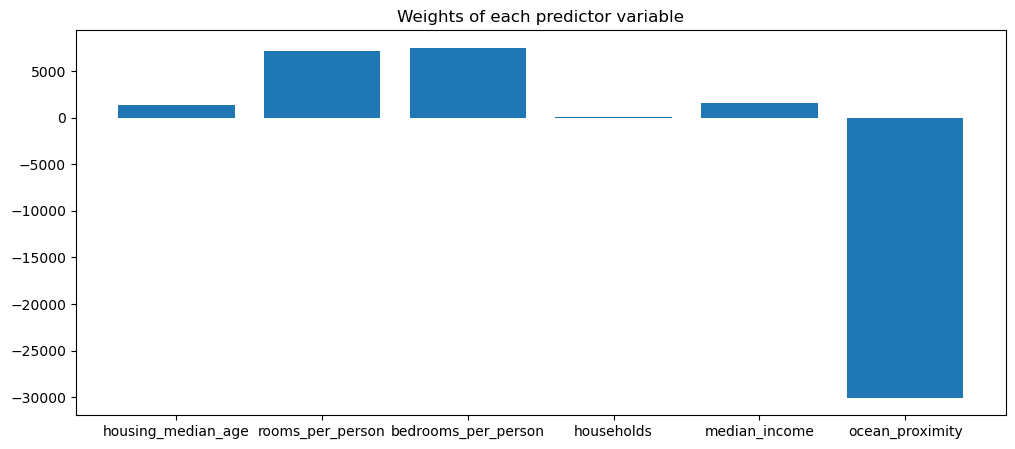

In [24]:
fig = plt.figure(figsize = (12, 5))
plt.bar(xTrain.columns, model_multi.coef_);
plt.title("Weights of each predictor variable");
plt.show()

## Question 5
Considering the relationship between the (standardized) variables 2 and 3, is there potentially a concern regarding collinearity? Is there a similar concern regarding variables 4 and 5, if you were to include them in the model?

In [25]:
print("Correlation between rooms_per_person and bedrooms_per_person:",
    data_norm['rooms_per_person'].corr(data_norm['bedrooms_per_person']))

Correlation between rooms_per_person and bedrooms_per_person: 0.6414637002481954


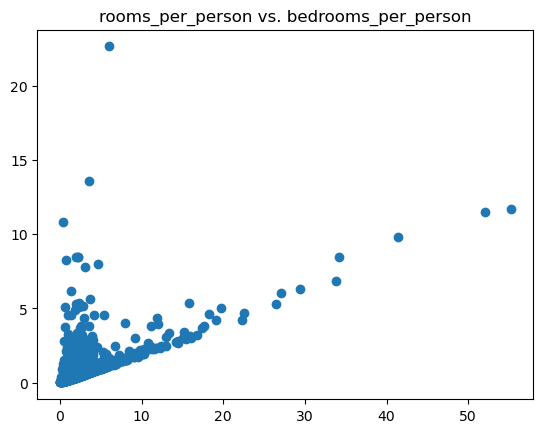

In [26]:
plt.scatter(data_norm['rooms_per_person'], data_norm['bedrooms_per_person']);
plt.title("rooms_per_person vs. bedrooms_per_person");
plt.show()

In [27]:
print("Correlation between population and households:",
      data_norm['population'].corr(data_norm['households']))

Correlation between population and households: 0.9072222660959619


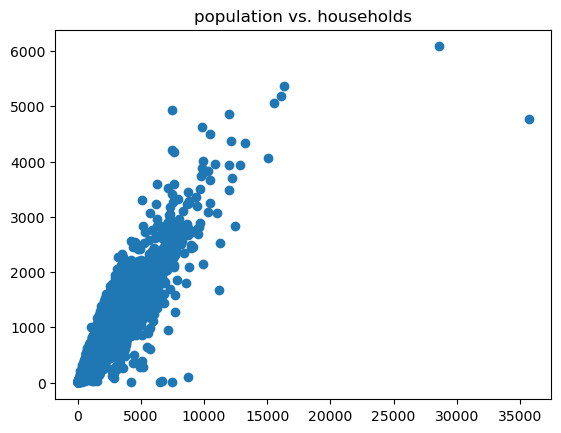

In [28]:
plt.scatter(data_norm['population'], data_norm['households']);
plt.title("population vs. households");
plt.show()

In [29]:
print("Correlation between total rooms and total bedrooms:",
      data['total_rooms'].corr(data['total_bedrooms']))

Correlation between total rooms and total bedrooms: 0.9999997239297028


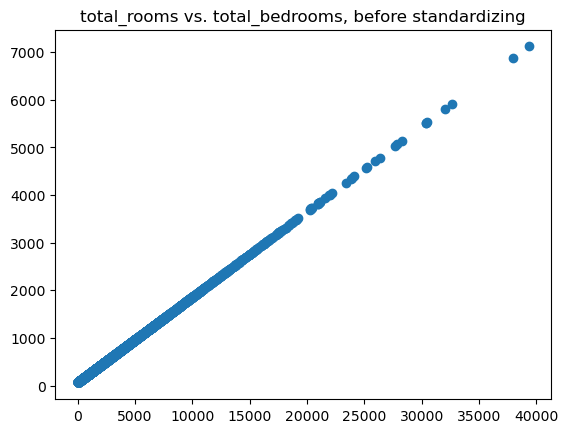

In [30]:
plt.scatter(data['total_rooms'], data['total_bedrooms']);
plt.title("total_rooms vs. total_bedrooms, before standardizing");
plt.show()

## Extra Credit
## Part A
Do any of the variables (predictor or outcome) follow a distribution that can reasonably be described as a normal distribution?

[[<AxesSubplot: title={'center': 'housing_median_age'}>
  <AxesSubplot: title={'center': 'population'}>
  <AxesSubplot: title={'center': 'households'}>]
 [<AxesSubplot: title={'center': 'median_income'}>
  <AxesSubplot: title={'center': 'ocean_proximity'}>
  <AxesSubplot: title={'center': 'median_house_value'}>]
 [<AxesSubplot: title={'center': 'rooms_per_person'}>
  <AxesSubplot: title={'center': 'bedrooms_per_person'}> <AxesSubplot: >]]


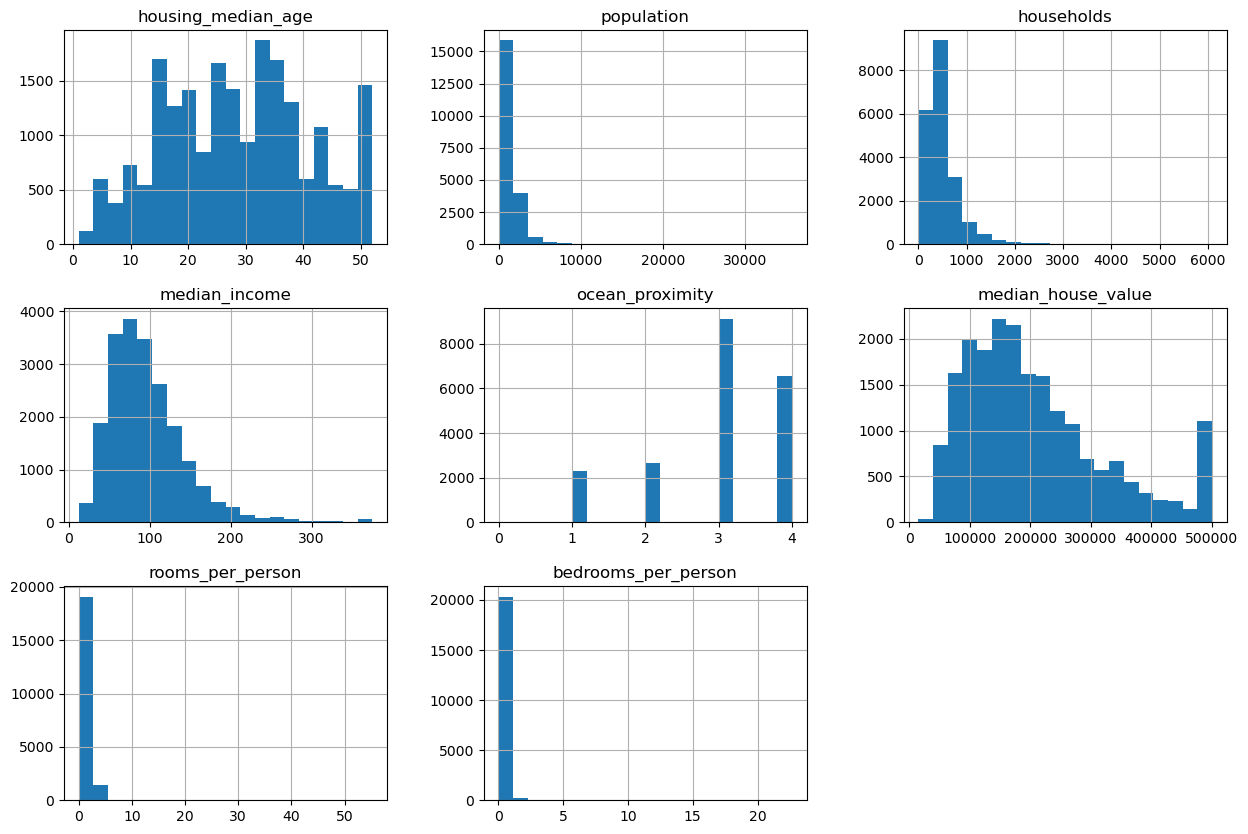

In [31]:
print(data_norm.hist(bins=20, figsize=(15,10)))

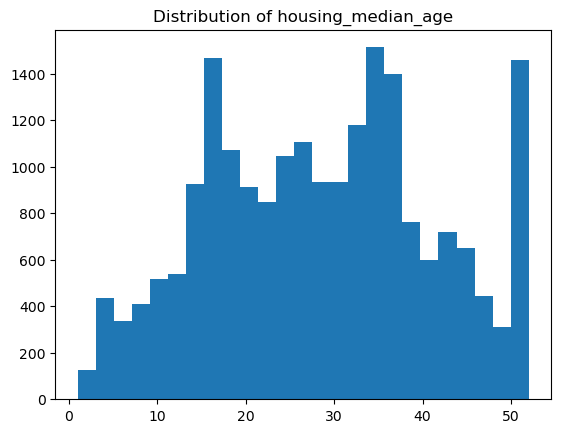

In [32]:
# more bins for housing_median_age
plt.hist(data_norm['housing_median_age'], bins=25);
plt.title("Distribution of housing_median_age");
plt.show()

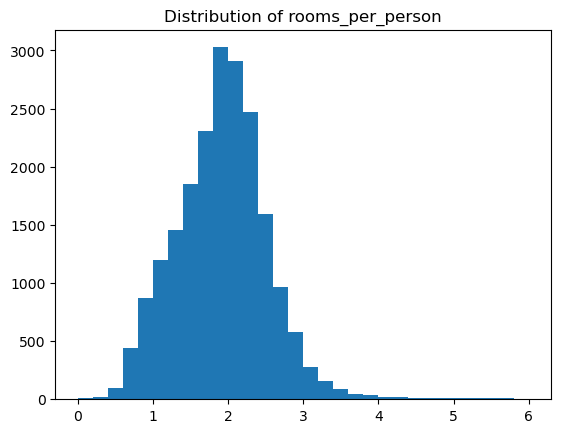

In [33]:
# further investigation: 
# zoom in on rooms_per_person
plt.hist(data_norm['rooms_per_person'], bins=30, range=[0,6]);
plt.title("Distribution of rooms_per_person")
plt.show()

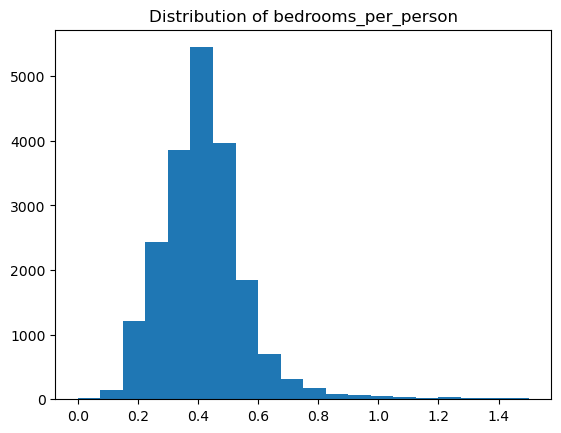

In [34]:
# zoom in on bedrooms_per_person
plt.hist(data_norm['bedrooms_per_person'], bins=20, range=[0,1.5]);
plt.title("Distribution of bedrooms_per_person");
plt.show()

## Part B
Examine the distribution of the outcome variable. Are there any characteristics of this distribution that might limit the validity of the conclusions when answering the questions above? If so, please comment on this characteristic.

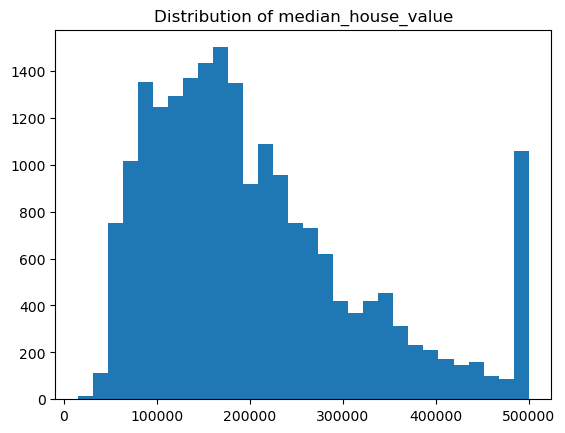

In [35]:
plt.hist(data_norm['median_house_value'], bins=30);
plt.title('Distribution of median_house_value');
plt.show()